## Analyzing the backtest results

In [33]:
import logging
import os
import re
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import bs_threading
from matplotlib import pyplot
import importlib
import time
from datetime import datetime, timedelta, timezone
import dateutil
import pandas as pd
importlib.reload(bs_threading)
from bs_threading import bs_threadify, bs_make_throttle_ready_func, bs_multiprocessify,f


In [2]:
# load all the stocks
# we do it together to the final of the sytem skk

INPUT_KITE_HISTORICAL_DIR = "input/kite_historical"
INPUT_KITE_INSTRUMENTS_DIR = "input/kite_instruments"
BACKTEST_DIR = "output/bsstonks_backtest"

In [18]:
for backtest_strategy_dir in os.listdir(BACKTEST_DIR):
    print(backtest_strategy_dir)

all_ma_overlap_5_100
ma_overlap_15_100
ma_overlap_5_100


In [66]:
backtest_strategy_dir = "all_ma_overlap_5_100"
strategy_symbol_summary = []
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file))
    start_balance = df[df['buysell']=='sell'].iloc[0]['balance']
    end_balance = df[df['buysell']=='sell'].iloc[-1]['balance']
    pnl = (end_balance-100000)
    pnl_multiplier = pnl/100000
    print(pnl_multiplier)
    start_date = dateutil.parser.parse(df['date'].iloc[0])
    end_date = dateutil.parser.parse(df['date'].iloc[-1])
    span_days = (end_date-start_date).days
    
    pnl_percentage_multiplier_per_year = (pnl_multiplier-1)*100/span_days*365
    strategy_symbol_summary.append({
        'symbol':backtest_symbol_file,
        'p&l % per year': pnl_percentage_multiplier_per_year,
        'p&l %':(pnl_multiplier-1)*100,
        'p&l': pnl, 
        'trades': df.shape[0]/2
    })
#     print("100000", start_balance, end_balance)
#     print("P&L --> ", )


---------------------
1000449_PREMIERPOL_EQ_NSE_NSE_day.csv
84.12910133243761
---------------------
1003009_NATCOPHARM_EQ_NSE_NSE_day.csv
90.68677476802448
---------------------
1008129_INDLMETER_EQ_NSE_NSE_day.csv
103.8586551619539
---------------------
1009921_EASUNREYRL-BZ_EQ_NSE_NSE_day.csv
-0.6403283910728104
---------------------
101121_BEML_EQ_NSE_NSE_day.csv
153.04341130038387
---------------------
1014529_GOCLCORP_EQ_NSE_NSE_day.csv
70.59415053484524
---------------------
1015041_REMSONSIND_EQ_NSE_NSE_day.csv
0.6382088351925794
---------------------
1018881_TNPL_EQ_NSE_NSE_day.csv
5.101606406289279
---------------------
101889_SGBNOV25VI-GB_EQ_NSE_NSE_day.csv
-0.009713995943204936
---------------------
1020673_GREENPLY_EQ_NSE_NSE_day.csv
1073.060927279524
---------------------
102145_NIACL_EQ_NSE_NSE_day.csv
-0.33937859710225604
---------------------
102401_GLOBE-BE_EQ_NSE_NSE_day.csv
0.16293538777219846
---------------------
10241_AEGISCHEM_EQ_NSE_NSE_day.csv
994.668845229044

0.16948001522006118
---------------------
1346049_INDUSINDBK_EQ_NSE_NSE_day.csv
90.8220337046693
---------------------
134657_BPCL_EQ_NSE_NSE_day.csv
5.8939200504175995
---------------------
1347585_PDSMFL_EQ_NSE_NSE_day.csv
0.8022744059586283
---------------------
135169_SRTRANSFIN-YJ_EQ_NSE_NSE_day.csv
-0.05463665601103756
---------------------
135681_BPL_EQ_NSE_NSE_day.csv
8.878560756413554
---------------------
136330244_TCS_EQ_BSE_BSE_day.csv
0.31308500454788707
---------------------
1367297_KSHITIJPOL-SM_EQ_NSE_NSE_day.csv
-0.02
---------------------
1371649_PENINLAND-BE_EQ_NSE_NSE_day.csv
24.76230749175825
---------------------
1376769_ASAHIINDIA_EQ_NSE_NSE_day.csv
10.2372130481264
---------------------
1378561_AAVAS_EQ_NSE_NSE_day.csv
0.1395892780524504
---------------------
138241_SGBNOV25IX-GB_EQ_NSE_NSE_day.csv
-0.0031217481789801967
---------------------
1388801_JBFIND-BE_EQ_NSE_NSE_day.csv
184.6566489855863
---------------------
1389569_TRIGYN_EQ_NSE_NSE_day.csv
27.7703094

0.00474536294787802
---------------------
2009857_RAMCOSYS_EQ_NSE_NSE_day.csv
109.75051226916284
---------------------
2010113_INOXWIND_EQ_NSE_NSE_day.csv
-0.3678576310406185
---------------------
2010369_BIL-BE_EQ_NSE_NSE_day.csv
82.1027757607539
---------------------
2012673_GEPIL_EQ_NSE_NSE_day.csv
20.124802410041507
---------------------
2021121_ASHIMASYN-BE_EQ_NSE_NSE_day.csv
4.450759845749818
---------------------
20225_ALEMBICLTD_EQ_NSE_NSE_day.csv
25.93107109912583
---------------------
2022913_LFIC_EQ_NSE_NSE_day.csv
1.3947041050147142
---------------------
2024705_DELTAMAGNT-BE_EQ_NSE_NSE_day.csv
7.291658645628331
---------------------
2029825_CADILAHC_EQ_NSE_NSE_day.csv
18.74101599216859
---------------------
2030081_BYKE-BE_EQ_NSE_NSE_day.csv
-0.07404774054337264
---------------------
2031617_AVANTIFEED_EQ_NSE_NSE_day.csv
5.43303193866109
---------------------
2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv
23.281959847811102
---------------------
2036737_ECLFINANCE-NM_EQ_NSE_NSE_d

0.02439024390243925
---------------------
2460673_L&TFINANCE-NK_EQ_NSE_NSE_day.csv
-0.04320753284228107
---------------------
2463745_L&TFINANCE-NO_EQ_NSE_NSE_day.csv
0.03333333333333343
---------------------
2468097_KHANDSE_EQ_NSE_NSE_day.csv
1.7738252847532532
---------------------
2468865_L&TFINANCE-NQ_EQ_NSE_NSE_day.csv
-0.036039707351674444
---------------------
2469633_BSELINFRA_EQ_NSE_NSE_day.csv
-0.1519039007696898
---------------------
2472193_PATSPINLTD-BE_EQ_NSE_NSE_day.csv
4.570824806520396
---------------------
2474497_SUBCAPCITY-BE_EQ_NSE_NSE_day.csv
1.1907002915750164
---------------------
2475009_HIKAL_EQ_NSE_NSE_day.csv
4.845267944274695
---------------------
2475265_L&TFINANCE-NU_EQ_NSE_NSE_day.csv
0.02580114703344676
---------------------
247553_SUBEXLTD_EQ_NSE_NSE_day.csv
0.9075238022087104
---------------------
2477569_SOUTHWEST_EQ_NSE_NSE_day.csv
1.4731771625595782
---------------------
2478849_KPITTECH_EQ_NSE_NSE_day.csv
-0.15851715854513299
---------------------

-0.326681919506663
---------------------
2751745_NTPC-NC_EQ_NSE_NSE_day.csv
-0.1097495016493526
---------------------
2752257_NTPC-ND_EQ_NSE_NSE_day.csv
-0.014538286153649969
---------------------
2752769_UNIONBANK_EQ_NSE_NSE_day.csv
3.0231406792272346
---------------------
2753281_APTECHT_EQ_NSE_NSE_day.csv
49.03543762682245
---------------------
275457_ZENSARTECH_EQ_NSE_NSE_day.csv
48.267227994342
---------------------
2756609_OAL_EQ_NSE_NSE_day.csv
-0.05119107957425236
---------------------
2761217_NOIDATOLL_EQ_NSE_NSE_day.csv
9.080202936843655
---------------------
2762497_NUCLEUS_EQ_NSE_NSE_day.csv
142.03676417696394
---------------------
2763265_CANBK_EQ_NSE_NSE_day.csv
2.142181847372593
---------------------
2768385_IDFCFIRSTB-N9_EQ_NSE_NSE_day.csv
-0.05287287051791078
---------------------
2769153_IDFCFIRSTB-NA_EQ_NSE_NSE_day.csv
0.09702452172778882
---------------------
2771969_SEYAIND_EQ_NSE_NSE_day.csv
-0.11020278087610758
---------------------
277761_GABRIEL_EQ_NSE_NSE_day.

15.35172571805502
---------------------
3006465_JINDALPHOT-BE_EQ_NSE_NSE_day.csv
-0.7889293997159827
---------------------
3008001_BCP-BE_EQ_NSE_NSE_day.csv
0.10227272727272706
---------------------
3008257_IRFC-NI_EQ_NSE_NSE_day.csv
-0.043454530835909826
---------------------
3009025_IRFC-NJ_EQ_NSE_NSE_day.csv
0.04458951035238206
---------------------
3009793_IRFC-NK_EQ_NSE_NSE_day.csv
0.051051120624744366
---------------------
3011073_JIYAECO-BE_EQ_NSE_NSE_day.csv
-0.1572580645161291
---------------------
3011329_JPPOWER_EQ_NSE_NSE_day.csv
6.443749748506253
---------------------
3013889_VISHAL_EQ_NSE_NSE_day.csv
-0.09483492642488447
---------------------
3014913_3IINFOTECH-BE_EQ_NSE_NSE_day.csv
2.0209321354639327
---------------------
3015169_GOKEX_EQ_NSE_NSE_day.csv
2.669233870572234
---------------------
3016193_EVEREADY_EQ_NSE_NSE_day.csv
139.7530188530498
---------------------
3019265_SAKSOFT_EQ_NSE_NSE_day.csv
8.812669667070224
---------------------
3020289_ALLSEC_EQ_NSE_NSE_day

192.85452214841317
---------------------
3418113_MALUPAPER_EQ_NSE_NSE_day.csv
0.6058942338615089
---------------------
342017_HEG_EQ_NSE_NSE_day.csv
519.4611359242203
---------------------
3421953_SGL_EQ_NSE_NSE_day.csv
3.692199021690254
---------------------
3424257_UTTAMSUGAR_EQ_NSE_NSE_day.csv
13.816792534974665
---------------------
3425537_KKCL_EQ_NSE_NSE_day.csv
22.17767133904051
---------------------
3429377_PUNJLLOYD-BZ_EQ_NSE_NSE_day.csv
-0.1831477660833222
---------------------
3430401_BHAGERIA_EQ_NSE_NSE_day.csv
-0.318395962609998
---------------------
3431425_SUNTV_EQ_NSE_NSE_day.csv
2.335196970371201
---------------------
3433473_GPIL-BE_EQ_NSE_NSE_day.csv
64.19247806905622
---------------------
3433985_RSYSTEMS_EQ_NSE_NSE_day.csv
18.65009700013196
---------------------
3435521_JETAIRWAYS-BZ_EQ_NSE_NSE_day.csv
13.12511465316828
---------------------
343553_SGBN28VIII-GB_EQ_NSE_NSE_day.csv
-0.009165390822195623
---------------------
3435777_EMKAY_EQ_NSE_NSE_day.csv
35.57893

4.774155729850485
---------------------
36609_SRPL-BE_EQ_NSE_NSE_day.csv
-0.980898272962978
---------------------
3661825_FSL_EQ_NSE_NSE_day.csv
6.61819070318549
---------------------
3663105_INDIANB_EQ_NSE_NSE_day.csv
8.233423101538104
---------------------
3665409_TTL-BE_EQ_NSE_NSE_day.csv
10.584524030913075
---------------------
3666689_TFL-BE_EQ_NSE_NSE_day.csv
0.5255966040123432
---------------------
3668225_SMSPHARMA_EQ_NSE_NSE_day.csv
10.422410333549134
---------------------
3669505_HSCL_EQ_NSE_NSE_day.csv
25.977758480060512
---------------------
3671809_GANESHHOUC-BE_EQ_NSE_NSE_day.csv
7.45679248543546
---------------------
3672577_ORIENTALTL_EQ_NSE_NSE_day.csv
0.0975566471180218
---------------------
3675137_MINDTREE_EQ_NSE_NSE_day.csv
15.814161730095192
---------------------
3676417_APOLLOPIPE_EQ_NSE_NSE_day.csv
-0.022142857142857245
---------------------
3677697_IDEA_EQ_NSE_NSE_day.csv
2.361250406573446
---------------------
3685889_AMDIND_EQ_NSE_NSE_day.csv
0.38223348366099

-0.9091193150136084
---------------------
3899905_AMBIKCO_EQ_NSE_NSE_day.csv
24.720025001526842
---------------------
3901185_BIRLAMONEY_EQ_NSE_NSE_day.csv
0.5931716542855872
---------------------
3905025_CEATLTD_EQ_NSE_NSE_day.csv
223.823200564154
---------------------
3906817_RPOWER-BE_EQ_NSE_NSE_day.csv
-0.18102719734793965
---------------------
3908097_JKIL_EQ_NSE_NSE_day.csv
45.35028173938987
---------------------
3909377_CORDSCABLE_EQ_NSE_NSE_day.csv
1.1696122914305602
---------------------
3911169_ONMOBILE_EQ_NSE_NSE_day.csv
0.1665090529222286
---------------------
3912449_KNRCON_EQ_NSE_NSE_day.csv
50.0026911348561
---------------------
3913729_HERCULES_EQ_NSE_NSE_day.csv
3.184237640876597
---------------------
391681_INDIANHUME_EQ_NSE_NSE_day.csv
69.67546620999997
---------------------
3917569_BANG_EQ_NSE_NSE_day.csv
2.872237127794835
---------------------
3918849_SHRIRAMEPC_EQ_NSE_NSE_day.csv
-0.1366543281684484
---------------------
3920129_IRB_EQ_NSE_NSE_day.csv
0.2830724746

29.691360851304044
---------------------
4481793_INCREDIBLE_EQ_NSE_NSE_day.csv
-0.427232889419925
---------------------
4483585_SETCO_EQ_NSE_NSE_day.csv
0.011536185911437206
---------------------
4485121_RTNPOWER_EQ_NSE_NSE_day.csv
-0.22565171624083902
---------------------
4486913_MAHASTEEL_EQ_NSE_NSE_day.csv
0.45507106753096827
---------------------
4488705_MGL_EQ_NSE_NSE_day.csv
0.33346575286692326
---------------------
4490497_DAMODARIND_EQ_NSE_NSE_day.csv
0.49450363862883273
---------------------
4492033_AMRUTANJAN_EQ_NSE_NSE_day.csv
3.587316192467402
---------------------
449537_JINDALPOLY_EQ_NSE_NSE_day.csv
54.445966873807244
---------------------
4502017_BIRLATYRE_EQ_NSE_NSE_day.csv
0.17594654788418718
---------------------
4505089_ASALCBR_EQ_NSE_NSE_day.csv
-0.05476299992660439
---------------------
45057_NHAI-N3_EQ_NSE_NSE_day.csv
-0.0008326394671108574
---------------------
4506369_MAHEPC_EQ_NSE_NSE_day.csv
-0.18765221897177967
---------------------
4512001_MOLDTECH_EQ_NSE_N

1.2926044730582569
---------------------
4829697_MAZDA_EQ_NSE_NSE_day.csv
0.7340538201743055
---------------------
4834049_SJVN_EQ_NSE_NSE_day.csv
0.11189875938110315
---------------------
4835585_KSL_EQ_NSE_NSE_day.csv
32.158298202801745
---------------------
4838145_JPINFRATEC-BE_EQ_NSE_NSE_day.csv
0.33573624129180246
---------------------
4843009_PNBHOUSING-BE_EQ_NSE_NSE_day.csv
0.20352381685431684
---------------------
4843777_VBL_EQ_NSE_NSE_day.csv
1.148004766911501
---------------------
4847361_SUNDARAM-BE_EQ_NSE_NSE_day.csv
-0.3864966867741979
---------------------
4849665_KINGFA_EQ_NSE_NSE_day.csv
0.011971775882306392
---------------------
4856065_KAPSTON-BE_EQ_NSE_NSE_day.csv
0.14690728516635018
---------------------
4856833_SGBMAY28-GB_EQ_NSE_NSE_day.csv
-0.025373490752895158
---------------------
4858113_UNIVASTU_EQ_NSE_NSE_day.csv
-0.06677050418447936
---------------------
4860929_IIFL-N4_EQ_NSE_NSE_day.csv
0.009110985975746735
---------------------
4861953_PIONDIST_EQ_NSE_

77.02168865018317
---------------------
5234177_PODDARHOUS_EQ_NSE_NSE_day.csv
-0.18578227506821843
---------------------
5235969_APCL_EQ_NSE_NSE_day.csv
0.33420325095632986
---------------------
5239553_SGBMAR25-GB_EQ_NSE_NSE_day.csv
0.6642694283204398
---------------------
5239809_FOCUS-SM_EQ_NSE_NSE_day.csv
-0.3626694828763696
---------------------
524545_CHENNPETRO_EQ_NSE_NSE_day.csv
8.574928007564404
---------------------
5245697_WIPL-BE_EQ_NSE_NSE_day.csv
0.028392255031910462
---------------------
5246465_DEVIT-SM_EQ_NSE_NSE_day.csv
0.38092561013271214
---------------------
5250305_MKPL-SM_EQ_NSE_NSE_day.csv
-0.04460147101018578
---------------------
5252097_SIKKO-SM_EQ_NSE_NSE_day.csv
-0.3486807036247334
---------------------
5256193_AXISGOLD_EQ_NSE_NSE_day.csv
0.6854986955708932
---------------------
5256705_GRAVITA_EQ_NSE_NSE_day.csv
22.175157816954503
---------------------
5263361_DOLLAR_EQ_NSE_NSE_day.csv
-0.14841450453055383
---------------------
5277697_SUPERHOUSE_EQ_NSE_NS

5.0012950426363565
---------------------
587265_MTNL_EQ_NSE_NSE_day.csv
0.20394408141602646
---------------------
589569_HAL_EQ_NSE_NSE_day.csv
0.3265530902527817
---------------------
590593_MUNJALSHOW_EQ_NSE_NSE_day.csv
14.936708561577339
---------------------
592129_MURUDCERA_EQ_NSE_NSE_day.csv
-0.15456119619917533
---------------------
592897_HEIDELBERG_EQ_NSE_NSE_day.csv
25.12399710791012
---------------------
593665_NCC_EQ_NSE_NSE_day.csv
786.8694508850521
---------------------
594433_URAVI-SM_EQ_NSE_NSE_day.csv
-0.049295774647887154
---------------------
595969_CPSEETF_EQ_NSE_NSE_day.csv
0.2447462514258416
---------------------
6003713_TCIDEVELOP_EQ_NSE_NSE_day.csv
0.5682553273858316
---------------------
604161_KARDA-BE_EQ_NSE_NSE_day.csv
-0.633475410458331
---------------------
60417_ASIANPAINT_EQ_NSE_NSE_day.csv
46.9324649191945
---------------------
6054401_MUTHOOTFIN_EQ_NSE_NSE_day.csv
6.145504491115335
---------------------
6093825_BSLGOLDETF_EQ_NSE_NSE_day.csv
0.789390376

-0.05249279488286877
---------------------
7452929_CARERATING_EQ_NSE_NSE_day.csv
1.9532293177887337
---------------------
745473_RIIL_EQ_NSE_NSE_day.csv
82.4432659278757
---------------------
7455745_PCJEWELLER_EQ_NSE_NSE_day.csv
4.093363341765953
---------------------
7458561_INDUSTOWER_EQ_NSE_NSE_day.csv
0.7172646760546865
---------------------
747009_ROLTA_EQ_NSE_NSE_day.csv
9.709217567415754
---------------------
749057_SOFTTECH-SM_EQ_NSE_NSE_day.csv
0.021705351707163645
---------------------
7496705_VMART_EQ_NSE_NSE_day.csv
7.400577928650027
---------------------
7503361_HUDCO-N4_EQ_NSE_NSE_day.csv
0.020197597030684848
---------------------
7503873_HUDCO-N5_EQ_NSE_NSE_day.csv
0.021372801259087575
---------------------
7506177_IRFC-N3_EQ_NSE_NSE_day.csv
-0.05057960711943524
---------------------
7506689_IRFC-N4_EQ_NSE_NSE_day.csv
-0.03176557316796883
---------------------
752385_RUBYMILLS_EQ_NSE_NSE_day.csv
25.941704571522497
---------------------
752897_RECLTD-NE_EQ_NSE_NSE_day.cs

98.33659056696568
---------------------
894977_TIRUMALCHM_EQ_NSE_NSE_day.csv
117.42084383504891
---------------------
895745_TATASTEEL_EQ_NSE_NSE_day.csv
18.11477530305584
---------------------
89601_BANARISUG_EQ_NSE_NSE_day.csv
20.150696500710918
---------------------
897537_TITAN_EQ_NSE_NSE_day.csv
172.84370836901232
---------------------
898305_TNPETRO_EQ_NSE_NSE_day.csv
0.7980020673509501
---------------------
900609_TORNTPHARM_EQ_NSE_NSE_day.csv
66.47706096050108
---------------------
901889_69MZ33-SG_EQ_NSE_NSE_day.csv
-0.022926815842347133
---------------------
907777_TTKPRESTIG_EQ_NSE_NSE_day.csv
269.32628576396695
---------------------
90881_SGBOCT25V-GB_EQ_NSE_NSE_day.csv
-0.01851819832803958
---------------------
913665_ADANIGREEN-BE_EQ_NSE_NSE_day.csv
16.78556224579405
---------------------
913921_UCALFUEL_EQ_NSE_NSE_day.csv
4.005559124702813
---------------------
91393_NAM-INDIA_EQ_NSE_NSE_day.csv
0.146329359064742
---------------------
916225_UNICHEMLAB_EQ_NSE_NSE_day.csv

In [84]:
print("Strategy:", backtest_strategy_dir)
df_symbol_summary = pd.DataFrame(strategy_symbol_summary)
print(df_symbol_summary.columns)
df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(20)


Strategy: all_ma_overlap_5_100
Index(['symbol', 'p&l % per year', 'p&l %', 'p&l', 'trades'], dtype='object')


,symbol,p&l % per year,p&l %,p&l,trades
1087,3830273_EMCO-BZ_EQ_NSE_NSE_day.csv,1.161952e+07,2.091833e+08,2.091834e+11,181.5
1898,77313_685RJ30-SG_EQ_NSE_NSE_day.csv,8.932346e+04,3.249906e+05,3.250906e+08,8.5
1948,81153_BAJFINANCE_EQ_NSE_NSE_day.csv,2.220574e+04,3.944712e+05,3.945712e+08,31.5
364,2276609_UNITECH-BZ_EQ_NSE_NSE_day.csv,1.710174e+04,3.074096e+05,3.075096e+08,32.5
899,3491073_JMFINANCIL_EQ_NSE_NSE_day.csv,1.615474e+04,2.367001e+05,2.368001e+08,38.5
1947,809473_SIMPLEXINF_EQ_NSE_NSE_day.csv,9.967622e+03,1.719073e+05,1.720073e+08,42.5
810,3348737_TRIVENI_EQ_NSE_NSE_day.csv,8.561542e+03,1.302058e+05,1.303058e+08,41.5
136,1316609_JAICORPLTD_EQ_NSE_NSE_day.csv,8.160196e+03,1.451621e+05,1.452621e+08,55.5
1068,380161_IFBIND_EQ_NSE_NSE_day.csv,7.560572e+03,1.324239e+05,1.325239e+08,42.0
744,3042305_MANINDS_EQ_NSE_NSE_day.csv,7.517693e+03,1.191709e+05,1.192709e+08,33.5


---------------------
1020673_GREENPLY_EQ_NSE_NSE_day.csv


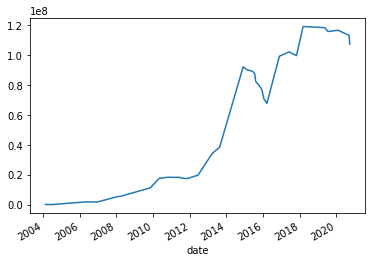

---------------------
10241_AEGISCHEM_EQ_NSE_NSE_day.csv


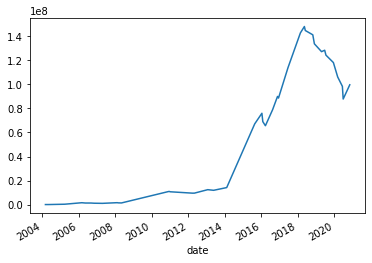

---------------------
1033473_AUSOMENT_EQ_NSE_NSE_day.csv


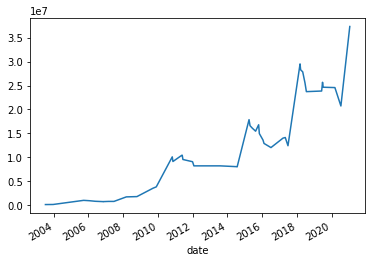

---------------------
1134081_JMCPROJECT_EQ_NSE_NSE_day.csv


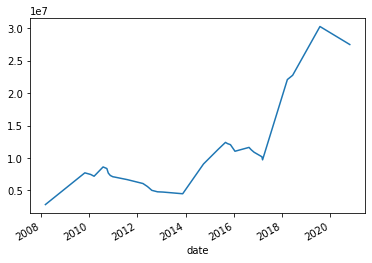

---------------------
1316609_JAICORPLTD_EQ_NSE_NSE_day.csv


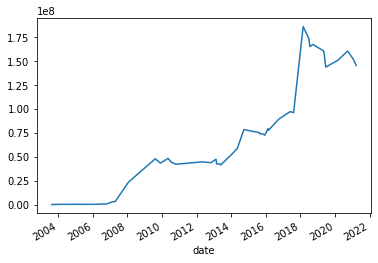

---------------------
1894657_RAJESHEXPO_EQ_NSE_NSE_day.csv


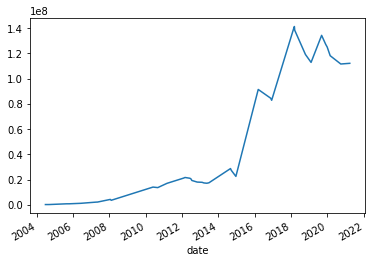

---------------------
2000385_ASHAPURMIN-BE_EQ_NSE_NSE_day.csv


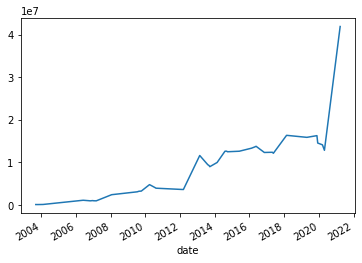

---------------------
219393_DHAMPURSUG_EQ_NSE_NSE_day.csv


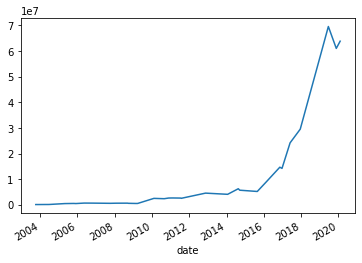

---------------------
2276609_UNITECH-BZ_EQ_NSE_NSE_day.csv


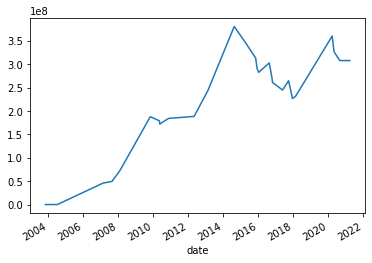

---------------------
2509313_TIL-BE_EQ_NSE_NSE_day.csv


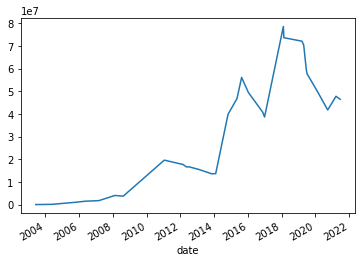

---------------------
2513665_HAVELLS_EQ_NSE_NSE_day.csv


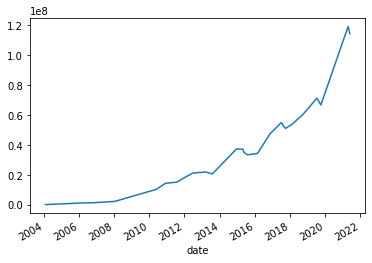

---------------------
25601_AMARAJABAT_EQ_NSE_NSE_day.csv


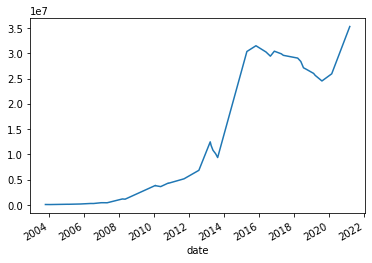

---------------------
2692097_FEL_EQ_NSE_NSE_day.csv


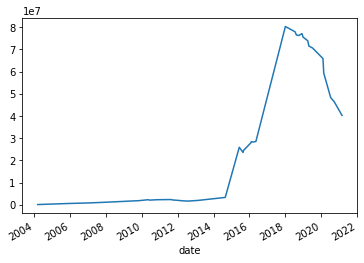

---------------------
2708225_MARKSANS_EQ_NSE_NSE_day.csv


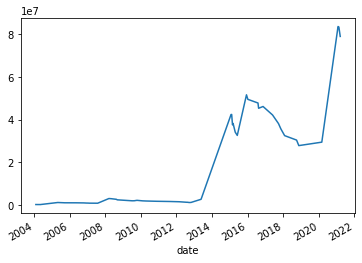

---------------------
2921217_RKFORGE_EQ_NSE_NSE_day.csv


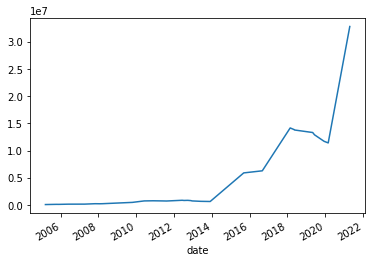

---------------------
3023873_IIFL-BE_EQ_NSE_NSE_day.csv


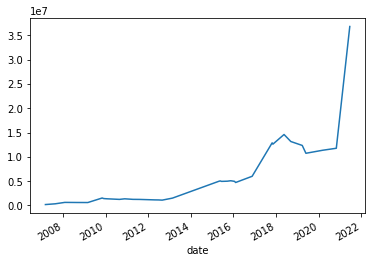

---------------------
3037185_PRIMESECU_EQ_NSE_NSE_day.csv


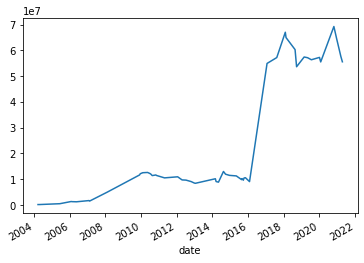

---------------------
3041281_JSWHL_EQ_NSE_NSE_day.csv


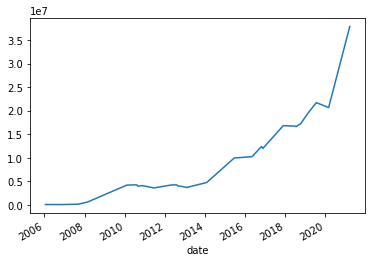

---------------------
3042305_MANINDS_EQ_NSE_NSE_day.csv


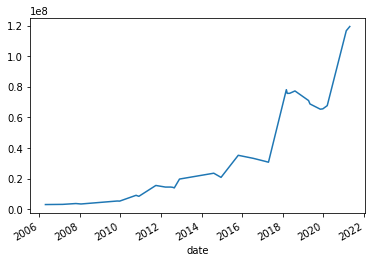

---------------------
3068673_ICIL_EQ_NSE_NSE_day.csv


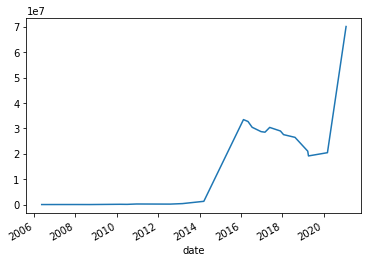

---------------------
3348737_TRIVENI_EQ_NSE_NSE_day.csv


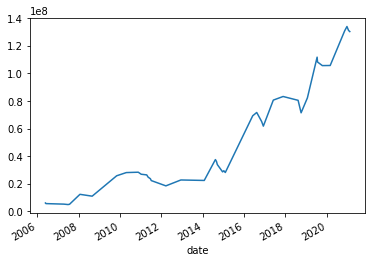

---------------------
342017_HEG_EQ_NSE_NSE_day.csv


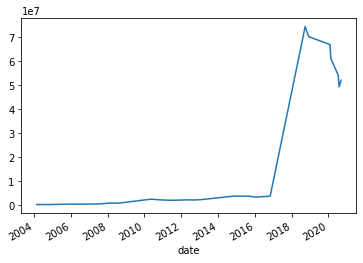

---------------------
3453697_JKLAKSHMI_EQ_NSE_NSE_day.csv


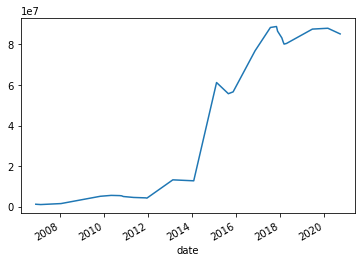

---------------------
3491073_JMFINANCIL_EQ_NSE_NSE_day.csv


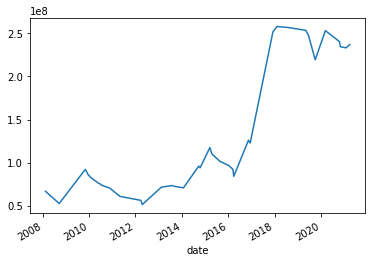

---------------------
3544065_MMFL_EQ_NSE_NSE_day.csv


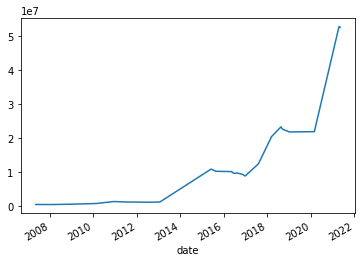

---------------------
3691009_ASTRAL_EQ_NSE_NSE_day.csv


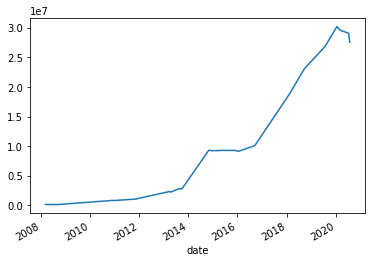

---------------------
380161_IFBIND_EQ_NSE_NSE_day.csv


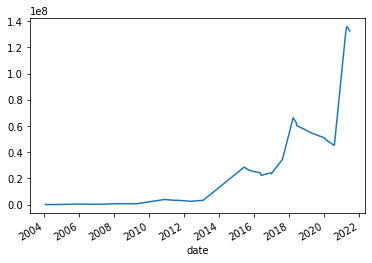

---------------------
3830273_EMCO-BZ_EQ_NSE_NSE_day.csv


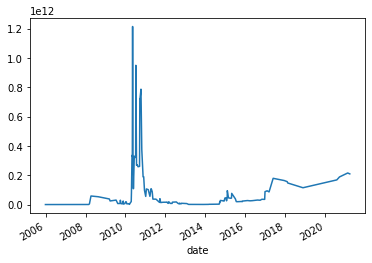

---------------------
4430593_AJMERA_EQ_NSE_NSE_day.csv


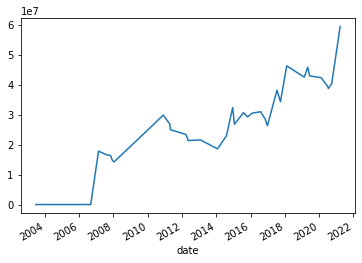

---------------------
464385_KALPATPOWR_EQ_NSE_NSE_day.csv


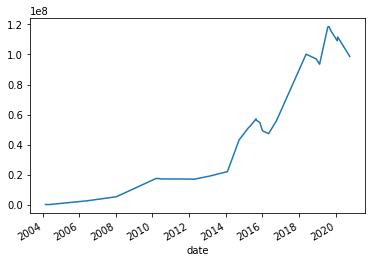

---------------------
593665_NCC_EQ_NSE_NSE_day.csv


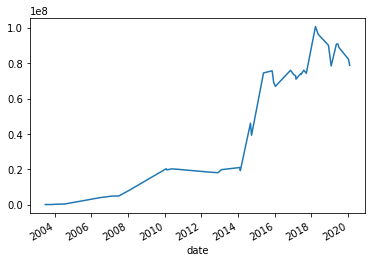

---------------------
640513_URJAPP-X1_EQ_NSE_NSE_day.csv


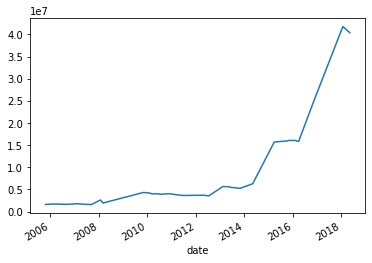

---------------------
693249_PRAKASH_EQ_NSE_NSE_day.csv


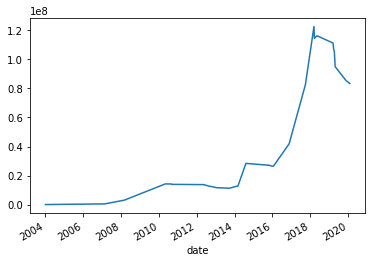

---------------------
7426049_SUNCLAYLTD_EQ_NSE_NSE_day.csv


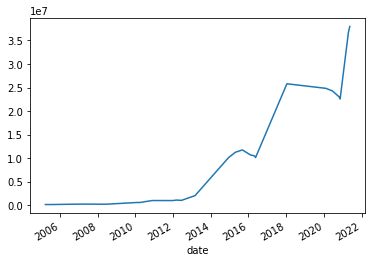

---------------------
77313_685RJ30-SG_EQ_NSE_NSE_day.csv


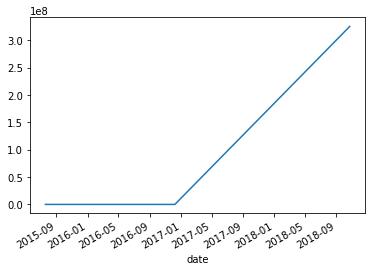

---------------------
809473_SIMPLEXINF_EQ_NSE_NSE_day.csv


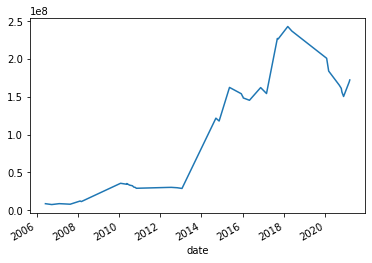

---------------------
81153_BAJFINANCE_EQ_NSE_NSE_day.csv


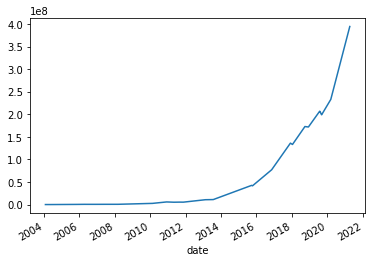

---------------------
947969_VIPIND_EQ_NSE_NSE_day.csv


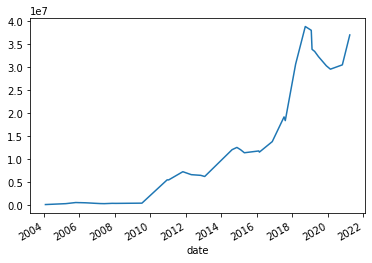

---------------------
956417_WALCHANNAG_EQ_NSE_NSE_day.csv


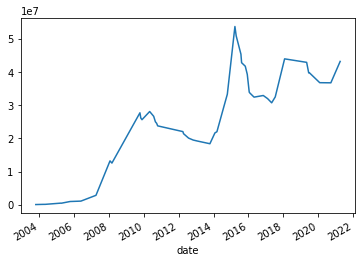

---------------------
961793_VENKEYS_EQ_NSE_NSE_day.csv


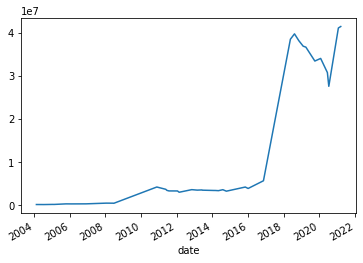

In [83]:
top_profits = df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(40)['symbol'].values
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    
    
    if backtest_symbol_file not in top_profits:
        continue
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file), index_col="date", parse_dates=True, date_parser=dateutil.parser.parse)
#     df.index_col = 0
#     df.date.astype("datetime")
    df[df['buysell']=='sell']['balance'].plot()
    pyplot.show()